In [15]:
import cv2

# 초점 거리와 물체까지의 거리
focal_length = 26 # 가정: mm 단위
distance_to_object = 1000 # 가정: mm 단위

# 이미지를 읽어옵니다.
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/1.jpg', cv2.IMREAD_COLOR)

In [17]:
# 이미지의 사이즈를 1/4배로 줄입니다.
height, width = image.shape[:2]
resized_image = cv2.resize(image, (width//4, height//4))

gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# 물체를 감지합니다.
edges = cv2.Canny(gray, 50, 150)

# 물체의 경계를 찾습니다.
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    if cv2.contourArea(contour) > 100:  # 노이즈 제거
        x, y, w, h = cv2.boundingRect(contour)

        # 물체의 실제 폭을 계산합니다.
        real_width = (w * distance_to_object) / focal_length
        
        print(f"Detected object width in resized image: {w} pixels")
        print(f"Estimated real object width: {real_width} mm")

        # 결과를 이미지에 표시합니다.
        cv2.rectangle(resized_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(resized_image, f"{real_width:.2f} mm", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2.imshow('Detected Objects', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detected object width in resized image: 138 pixels
Estimated real object width: 5307.692307692308 mm
Detected object width in resized image: 103 pixels
Estimated real object width: 3961.5384615384614 mm
Detected object width in resized image: 47 pixels
Estimated real object width: 1807.6923076923076 mm
Detected object width in resized image: 118 pixels
Estimated real object width: 4538.461538461538 mm
Detected object width in resized image: 84 pixels
Estimated real object width: 3230.769230769231 mm
Detected object width in resized image: 563 pixels
Estimated real object width: 21653.846153846152 mm
Detected object width in resized image: 122 pixels
Estimated real object width: 4692.307692307692 mm
Detected object width in resized image: 39 pixels
Estimated real object width: 1500.0 mm
Detected object width in resized image: 71 pixels
Estimated real object width: 2730.769230769231 mm


In [3]:
image.shape

AttributeError: 'NoneType' object has no attribute 'shape'

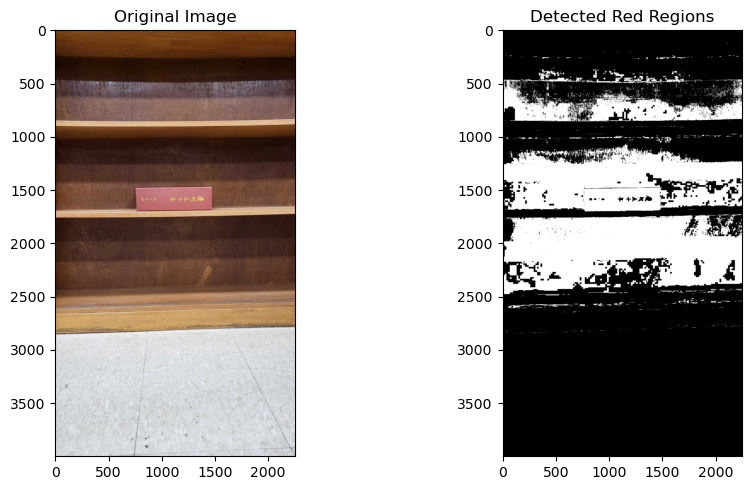

2711252

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 붉은색 범위 다시 설정 (HSV)
lower_red_1 = np.array([0, 70, 50])
upper_red_1 = np.array([10, 255, 255])
lower_red_2 = np.array([160, 70, 50])
upper_red_2 = np.array([180, 255, 255])

# HSV 이미지에서 붉은색만 추출하기 위한 임계값
mask1 = cv2.inRange(image_hsv, lower_red_1, upper_red_1)
mask2 = cv2.inRange(image_hsv, lower_red_2, upper_red_2)
mask = mask1 + mask2

# 붉은색 픽셀 수 다시 계산
red_pixel_count = np.sum(mask > 0)

# 결과 이미지 다시 보여주기
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Detected Red Regions')

plt.tight_layout()
plt.show()

red_pixel_count


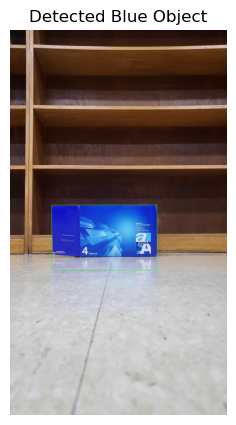

(1094, 681)

In [19]:
# 이미지 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/21.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 파란색 범위 설정 (HSV)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# HSV 이미지에서 파란색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기 (다수의 작은 물체가 감지될 수 있으므로)
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected Blue Object')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환

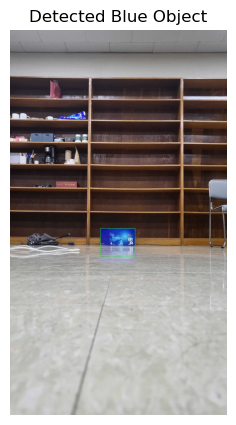

(360, 290)

In [20]:
# 이미지 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/23.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 파란색 범위 설정 (HSV)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# HSV 이미지에서 파란색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기 (다수의 작은 물체가 감지될 수 있으므로)
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected Blue Object')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환

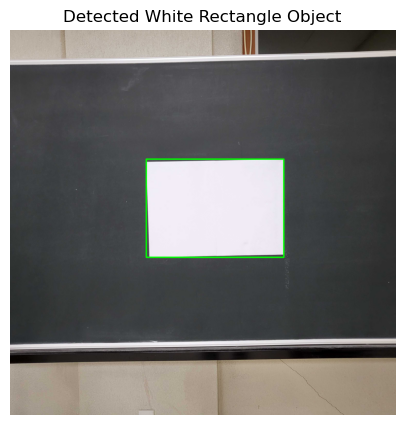

(1066, 763)

In [24]:
# 이미지 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/41.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected White Rectangle Object')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환

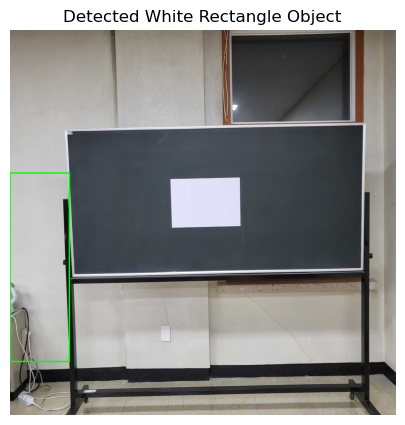

(460, 1465)

In [25]:
# 이미지 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/42.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected White Rectangle Object')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환

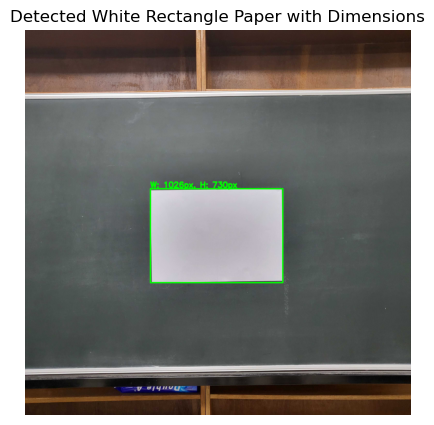

(1026, 730)

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/81.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected White Rectangle Paper with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


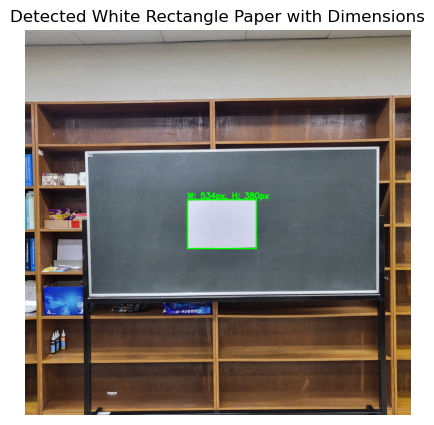

(534, 380)

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/82-2.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected White Rectangle Paper with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


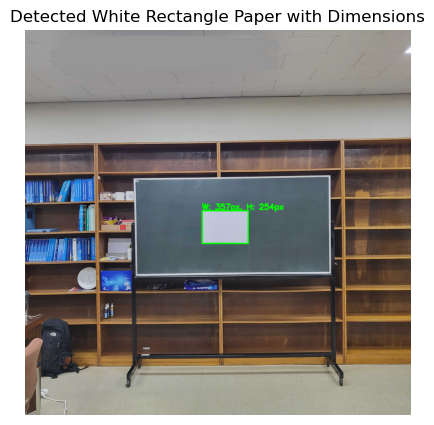

(357, 254)

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/83-4.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected White Rectangle Paper with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


In [36]:
357 * 3

1071

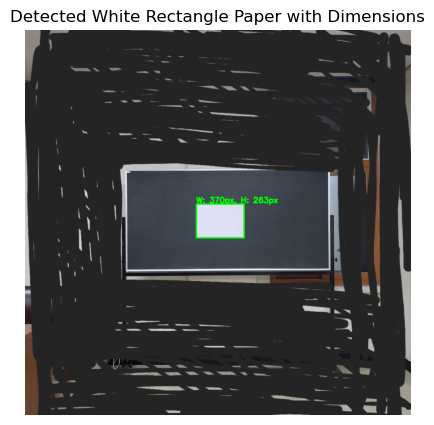

(370, 263)

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/1313.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected White Rectangle Paper with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


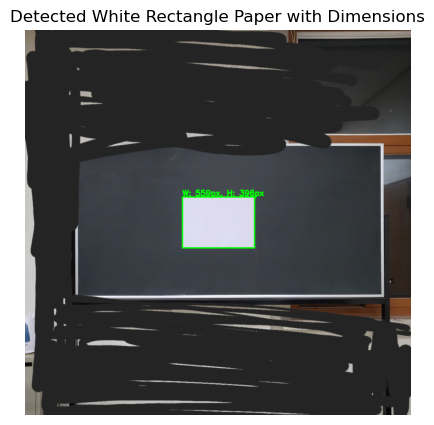

(559, 396)

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/1414-2.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected White Rectangle Paper with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


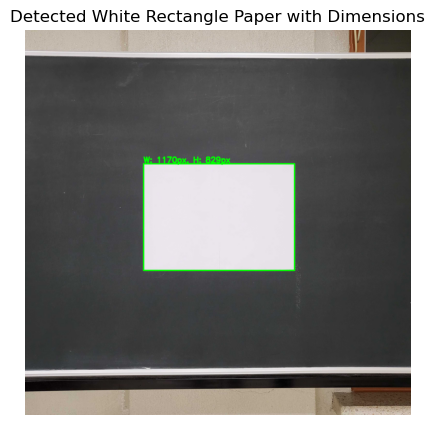

(1170, 829)

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/1515.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
plt.title('Detected White Rectangle Paper with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


In [41]:
370 * 3

1110

In [43]:
559 * 2

1118

## 준비

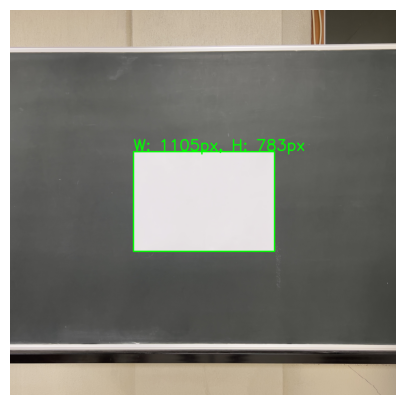

(1105, 783)

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/3.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기 (칠판에 붙은 흰색 A4 용지가 가장 큰 물체라고 가정)
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
# plt.title('Detected White A4 Paper on the Board with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


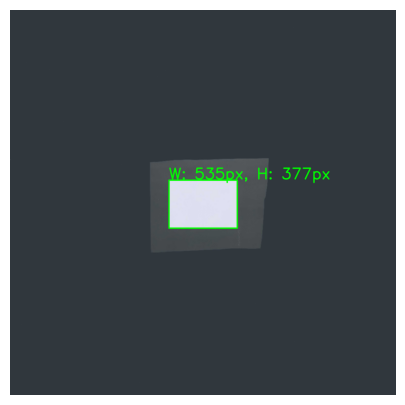

(535, 377)

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/2-1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기 (칠판에 붙은 흰색 A4 용지가 가장 큰 물체라고 가정)
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
# plt.title('Detected White A4 Paper on the Board with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


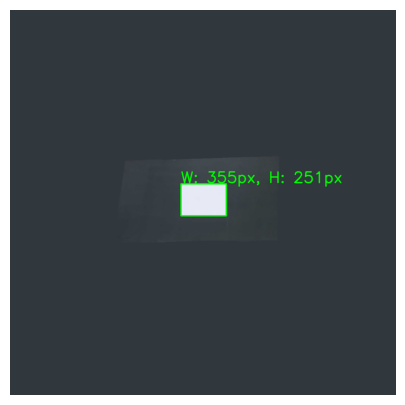

(355, 251)

In [62]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/1-1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기 (칠판에 붙은 흰색 A4 용지가 가장 큰 물체라고 가정)
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
# plt.title('Detected White A4 Paper on the Board with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


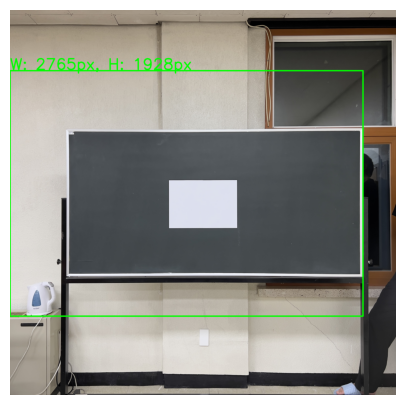

(2765, 1928)

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/2.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기 (칠판에 붙은 흰색 A4 용지가 가장 큰 물체라고 가정)
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
# plt.title('Detected White A4 Paper on the Board with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


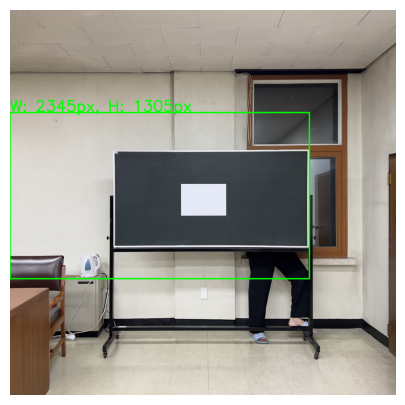

(2345, 1305)

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 다시 로드
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 흰색 범위 설정 (HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# HSV 이미지에서 흰색만 추출하기 위한 임계값
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# 노이즈 제거 (모폴로지 연산)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# 마스크에서 물체의 경계 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # 가장 큰 물체의 경계 찾기 (칠판에 붙은 흰색 A4 용지가 가장 큰 물체라고 가정)
    main_contour = max(contours, key=cv2.contourArea)
    
    # 경계를 감싸는 사각형 찾기
    x, y, w, h = cv2.boundingRect(main_contour)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 10)
    
    # 가로 세로 픽셀 수 텍스트로 이미지 위에 출력
    text = f"W: {w}px, H: {h}px"
    cv2.putText(image_rgb, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 255, 0), 10)

# 결과 이미지 보여주기
plt.figure(figsize=(10, 5))

plt.imshow(image_rgb)
# plt.title('Detected White A4 Paper on the Board with Dimensions')
plt.axis('off')
plt.show()

w, h  # 물체의 가로와 세로 픽셀 수 반환


In [47]:
355 * 3

1065

In [48]:
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/1-1.jpg')
image.shape

(3024, 3024, 3)

In [49]:
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/1.jpg')
image.shape

(3024, 3024, 3)

In [52]:
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/2-1.jpg')
image.shape

(3024, 3024, 3)

In [53]:
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/3.jpg')
image.shape

(3024, 3024, 3)

In [66]:
1105 / 355

3.112676056338028

In [67]:
image = cv2.imread('c:/Users/Playdata/Desktop/BigLeader/3/4.jpg')
image.shape

(2992, 2992, 3)